In [71]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import t
# 1. Sinh dữ liệu “null” (không có liên quan)
#    - X: 5 biến độc lập ~ N(0,1)
#    - Y: độc lập với X, Y ~ N(0,1)
n = 500
p = 5

# X = np.random.normal(size = (n, p))
# y = np.random.normal(size = (n, 1))
# X = sm.add_constant(X)

def model_fit(X, y, seed):
    n = 500
    p = 5
    X = np.random.normal(size = (n, p))
    y = np.random.normal(size = (n, 1))
    X = sm.add_constant(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=seed)
    n, p = X_train.shape
    beta_hat = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

    residual = y_train - X_train @ beta_hat
    sigma_squared = (residual.T @ residual) / (n - p)
    var_beta_hat = sigma_squared * np.linalg.inv(X_train.T @ X_train)
    se_beta = np.sqrt(np.diag(var_beta_hat))
    
    t_stats = beta_hat.flatten() / se_beta

    p_values = 2 * (1 - t.cdf(np.abs(t_stats), df = n - p))

    return p_values

p_value_list = []
iter = 2000
for _ in range(iter):
    p_value = model_fit(X, y, np.random.randint(0, iter * 100))
    p_value_list.append(p_value)

pvalues_df = pd.DataFrame(p_value_list, columns=['Intercept'] + [f'X{i + 1}' for i in range(X.shape[1] - 1)])

    

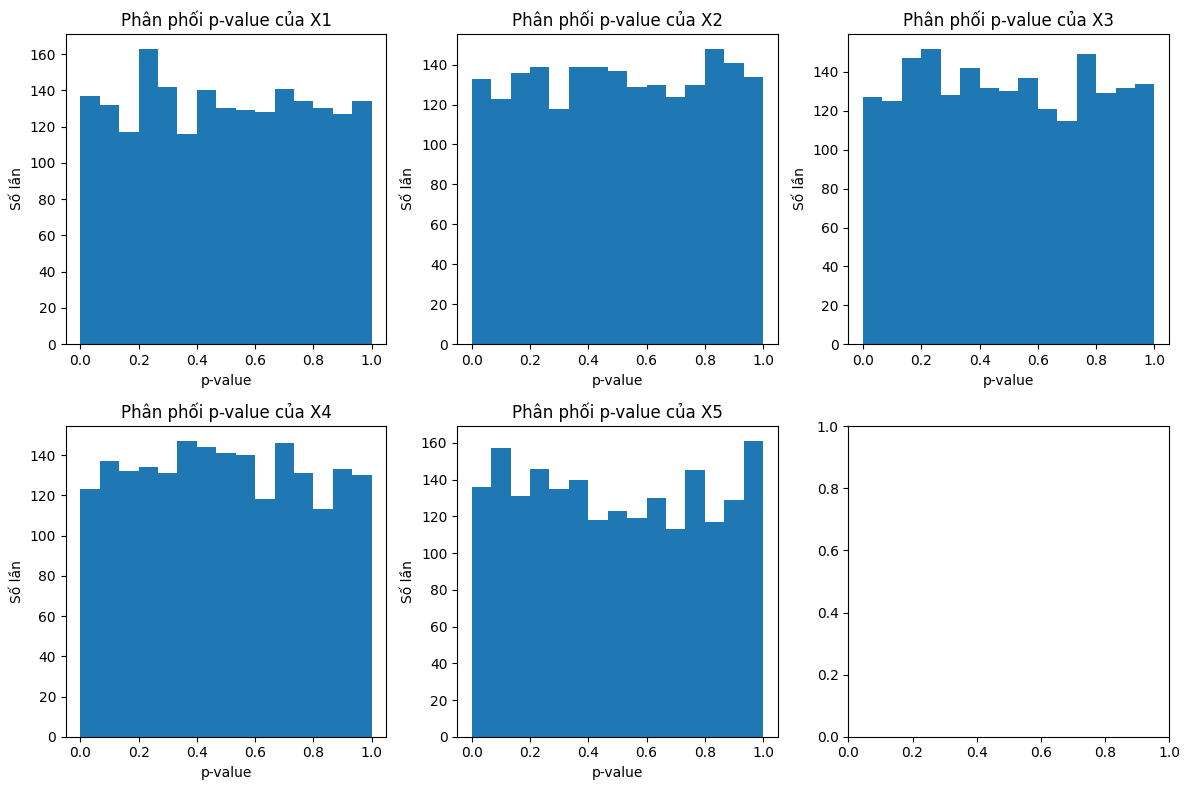

In [72]:
slope_columns = pvalues_df.columns[1:]


fig, axes = plt.subplots(2, 3, figsize = (12, 8))
axes = axes.flatten()

for idx, col in enumerate(slope_columns):
    axes[idx].hist(pvalues_df[col], bins = 15, range = (0, 1))
    axes[idx].set_title(f'Phân phối p-value của {col}')
    axes[idx].set_xlabel('p-value')
    axes[idx].set_ylabel('Số lần')

plt.tight_layout()
plt.show()

In [37]:
kstest(pvalues_df['X2'], 'uniform', args = (0, 1))

KstestResult(statistic=np.float64(0.06560377887023838), pvalue=np.float64(3.7455593303080426e-19), statistic_location=np.float64(0.5193962211297616), statistic_sign=np.int8(1))